In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality-red.csv')
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [5]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,799.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,399.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,799.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1198.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1598.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Figure size 576x576 with 0 Axes>

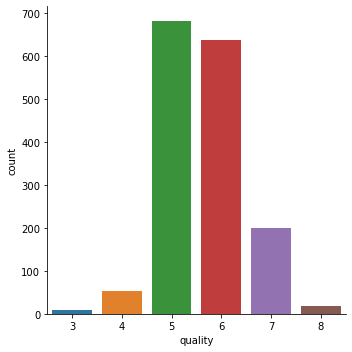

In [8]:
plt.figure(figsize=(8,8))
sns.catplot(x='quality',data=df,kind='count')
plt.show()

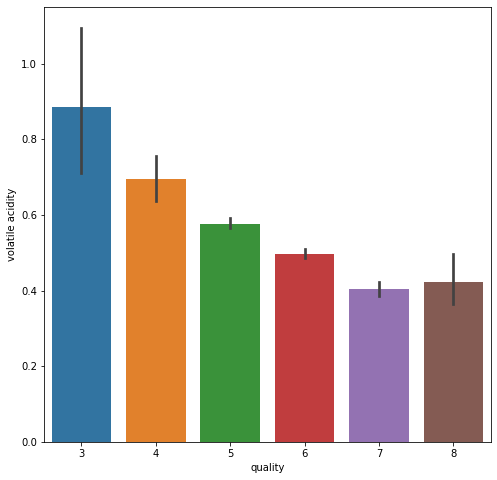

In [9]:
plt.figure(figsize=(8,8))
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.show()


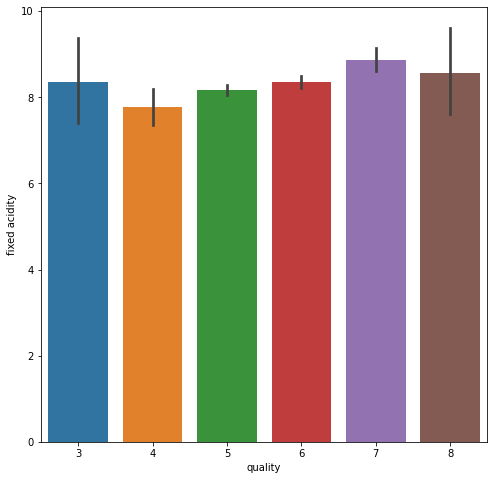

In [10]:
plt.figure(figsize=(8,8))
sns.barplot(x='quality',y='fixed acidity',data=df)
plt.show()


In [11]:
corr=df.corr()

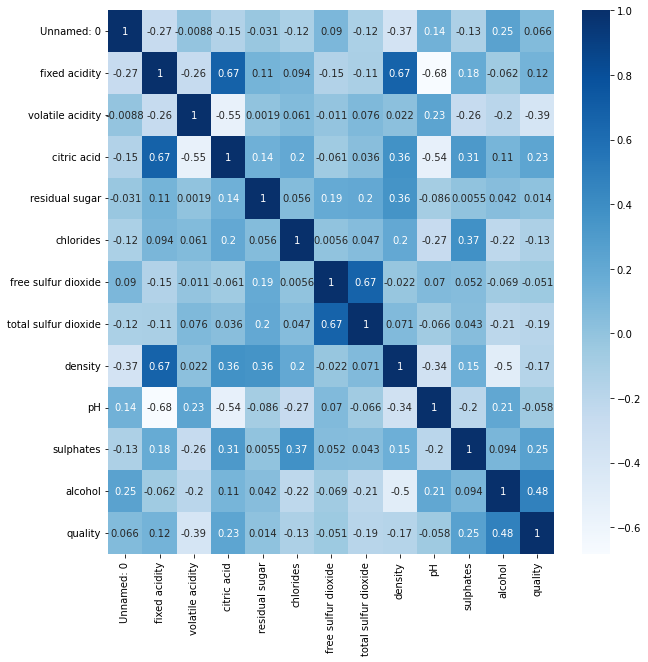

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,annot=True,annot_kws={'size':10},cmap='Blues',linecolor='Black')
plt.show()


In [13]:
x=df.drop('quality',axis=1)

In [14]:
x

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
#binarization
y=df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)


In [17]:
print(x.shape,x_train.shape,x_test.shape)


(1599, 12) (1279, 12) (320, 12)


In [42]:
x_train

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
606,606,9.4,0.41,0.48,4.6,0.072,10.0,20.0,0.99730,3.34,0.79,12.2
362,362,11.9,0.58,0.66,2.5,0.072,6.0,37.0,0.99920,3.05,0.56,10.0
533,533,10.3,0.27,0.24,2.1,0.072,15.0,33.0,0.99560,3.22,0.66,12.8
1397,1397,7.3,0.59,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,9.9
733,733,7.0,0.45,0.34,2.7,0.082,16.0,72.0,0.99800,3.55,0.60,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...
789,789,8.6,0.63,0.17,2.9,0.099,21.0,119.0,0.99800,3.09,0.52,9.3
256,256,9.4,0.34,0.37,2.2,0.075,5.0,13.0,0.99800,3.22,0.62,9.2
968,968,9.0,0.40,0.43,2.4,0.068,29.0,46.0,0.99430,3.20,0.60,12.2
952,952,8.2,0.31,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2


In [40]:
y_train

606     1
362     0
533     0
1397    0
733     0
       ..
789     0
256     0
968     0
952     1
1273    0
Name: quality, Length: 1279, dtype: int64

In [20]:
forest=RandomForestClassifier()

In [21]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
prediction=forest.predict(x_test)
accuracy=accuracy_score(prediction,y_test)

In [23]:
print(accuracy)

0.934375


In [24]:

value = (0, 7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4)

values = np.asarray(value)
input_reshaped = values.reshape(1, -1)

prediction = forest.predict(input_reshaped)

print (prediction)

[0]


In [25]:
if (prediction[0]==1):
    print('good quality wine')
else:
    print('bad quality wine')

bad quality wine


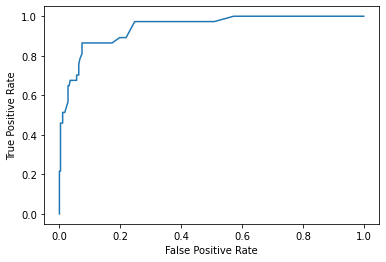

In [54]:

forest = RandomForestClassifier()

forest.fit(x_train, y_train)


predictions = forest.predict_proba(x_test)[::,1]

fpr, tpr, _ = roc_curve(y_test, predictions,pos_label= 1)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

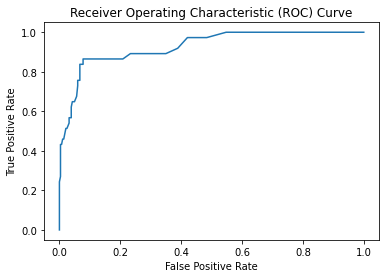

In [45]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
predictions = forest.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, predictions, pos_label=1)
auc_score = roc_auc_score(y_test, predictions)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
